In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
power_stations = pd.read_csv('../data/power_stations_clean.csv', delimiter=';', encoding='latin1')
Consumption2020_2024 = pd.read_csv('../data/Actual_consumption_202001010000_202405250100_Quarterhour.csv',na_values='-', sep=';', encoding='latin1', thousands=',')
Consumption2015_2020 = pd.read_csv('../data/Actual_consumption_201501010000_202001020100_Quarterhour.csv',na_values='-', delimiter=';', encoding='latin1',thousands=',')
Generation_2020_2024 = pd.read_csv('../data/Actual_generation_202001010000_202405250100_Quarterhour.csv',na_values='-', delimiter=';', encoding='latin1',thousands=',') #, dtype={3: float, 7:float, 13:float}
Generation_2015_2020 = pd.read_csv('../data/Actual_generation_201501010000_202001020100_Quarterhour.csv',na_values='-', sep=';', encoding='latin1',thousands=',') #, dtype={4: float, 13:float}
Cross_Border_2020_2024 = pd.read_csv('../data/Cross-border_physical_flows_202001010000_202405250100_Quarterhour.csv',na_values='-', delimiter=';', encoding='latin1',thousands=',') #,dtype={6:float,7:float,8:float,9:float,10:float,11:float,12:float,13:float,14:float,15:float,16:float,17:float,19:float,20:float,21:float,22:float,23:float,24:float}
Cross_Border_2015_2020 = pd.read_csv('../data/Cross-border_physical_flows_201501010000_202001020100_Quarterhour.csv',na_values='-', delimiter=';', encoding='latin1',thousands=',') #,dtype={4:float,6:float,7:float,8:float,11:float,12:float,15:float,17:float,19:float,20:float}
Prices_2015_2020 = pd.read_csv('../data/Day-ahead_prices_201501010000_202001020100_Quarterhour.csv', delimiter=';',na_values='-', encoding='utf-8',thousands=',') #, dtype={2:float,4:float,7:float,8:float,10:float,12:float,13:float,15:float,16:float,18:float}
Prices_2020_2024 = pd.read_csv('../data/Day-ahead_prices_202001010000_202405250100_Quarterhour.csv', delimiter=';',na_values='-', encoding='utf-8',thousands=',') #, dtype={7:float,13:float,18:float}

### Generation_2020_2024

In [3]:
Generation_2020_2024['Start date'] = pd.to_datetime(Generation_2020_2024['ï»¿Start date'], format='%b %d, %Y %I:%M %p')
Generation_2020_2024['End date'] = pd.to_datetime(Generation_2020_2024['End date'], format='%b %d, %Y %I:%M %p')
Generation_2020_2024= Generation_2020_2024.drop('ï»¿Start date', axis=1)
Generation_2020_2024 = Generation_2020_2024[['Start date',
 'End date',
 'Biomass [MWh] Original resolutions',
 'Hydropower [MWh] Original resolutions',
 'Wind offshore [MWh] Original resolutions',
 'Wind onshore [MWh] Original resolutions',
 'Photovoltaics [MWh] Original resolutions',
 'Other renewable [MWh] Original resolutions',
 'Nuclear [MWh] Original resolutions',
 'Lignite [MWh] Original resolutions',
 'Hard coal [MWh] Original resolutions',
 'Fossil gas [MWh] Original resolutions',
 'Hydro pumped storage [MWh] Original resolutions',
 'Other conventional [MWh] Original resolutions']]


### Generation_2015_2020

In [4]:
Generation_2015_2020['Start date'] = pd.to_datetime(Generation_2015_2020['ï»¿Start date'], format='%b %d, %Y %I:%M %p')
Generation_2015_2020['End date'] = pd.to_datetime(Generation_2015_2020['End date'], format='%b %d, %Y %I:%M %p')
Generation_2015_2020= Generation_2015_2020.drop('ï»¿Start date', axis=1)
Generation_2015_2020 = Generation_2015_2020[['Start date',
 'End date',
 'Biomass [MWh] Original resolutions',
 'Hydropower [MWh] Original resolutions',
 'Wind offshore [MWh] Original resolutions',
 'Wind onshore [MWh] Original resolutions',
 'Photovoltaics [MWh] Original resolutions',
 'Other renewable [MWh] Original resolutions',
 'Nuclear [MWh] Original resolutions',
 'Lignite [MWh] Original resolutions',
 'Hard coal [MWh] Original resolutions',
 'Fossil gas [MWh] Original resolutions',
 'Hydro pumped storage [MWh] Original resolutions',
 'Other conventional [MWh] Original resolutions']]
Generation_2015_2020 = Generation_2015_2020[Generation_2015_2020['End date'] <= '2020-01-01 00:00:00']

### Consumption2015_2020


In [5]:
Consumption2015_2020['Start date'] = pd.to_datetime(Consumption2015_2020['ï»¿Start date'], format='%b %d, %Y %I:%M %p')
Consumption2015_2020['End date'] = pd.to_datetime(Consumption2015_2020['End date'], format='%b %d, %Y %I:%M %p')
Consumption2015_2020= Consumption2015_2020.drop('ï»¿Start date', axis=1)
Consumption2015_2020 = Consumption2015_2020[Consumption2015_2020['End date'] <= '2020-01-01 00:00:00']

### Consumption2024_2024

In [6]:
Consumption2020_2024['Start date'] = pd.to_datetime(Consumption2020_2024['ï»¿Start date'], format='%b %d, %Y %I:%M %p')
Consumption2020_2024['End date'] = pd.to_datetime(Consumption2020_2024['End date'], format='%b %d, %Y %I:%M %p')
Consumption2020_2024= Consumption2020_2024.drop('ï»¿Start date', axis=1)

### Cross_Boader_2020_2024

In [7]:
Cross_Border_2020_2024['Start date'] = pd.to_datetime(Cross_Border_2020_2024['ï»¿Start date'], format='%b %d, %Y %I:%M %p')
Cross_Border_2020_2024['End date'] = pd.to_datetime(Cross_Border_2020_2024['End date'], format='%b %d, %Y %I:%M %p')
Cross_Border_2020_2024= Cross_Border_2020_2024.drop('ï»¿Start date', axis=1)


### Cross_Boader_2015_2020

In [8]:
Cross_Border_2015_2020['Start date'] = pd.to_datetime(Cross_Border_2015_2020['ï»¿Start date'], format='%b %d, %Y %I:%M %p')
Cross_Border_2015_2020['End date'] = pd.to_datetime(Cross_Border_2015_2020['End date'], format='%b %d, %Y %I:%M %p')
Cross_Border_2015_2020= Cross_Border_2015_2020.drop('ï»¿Start date', axis=1)
Cross_Border_2015_2020 = Cross_Border_2015_2020[Cross_Border_2015_2020['End date'] <= '2020-01-01 00:00:00']

### Prices_2015_2020

In [9]:
Prices_2015_2020['Start date'] = pd.to_datetime(Prices_2015_2020['Start date'], format='%b %d, %Y %I:%M %p')
Prices_2015_2020['End date'] = pd.to_datetime(Prices_2015_2020['End date'], format='%b %d, %Y %I:%M %p')
Prices_2015_2020 = Prices_2015_2020[Prices_2015_2020['End date'] <= '2020-01-01 00:00:00']

### Prices_2020_2024

In [10]:
Prices_2020_2024['Start date'] = pd.to_datetime(Prices_2020_2024['Start date'], format='%b %d, %Y %I:%M %p')
Prices_2020_2024['End date'] = pd.to_datetime(Prices_2020_2024['End date'], format='%b %d, %Y %I:%M %p')


#### Concat all to big DataFrames 

In [11]:
Prices = pd.concat([Prices_2015_2020, Prices_2020_2024])
Cross_Border = pd.concat([Cross_Border_2015_2020, Cross_Border_2020_2024])
Consumption = pd.concat([Consumption2015_2020, Consumption2020_2024])
Generation = pd.concat([Generation_2015_2020, Generation_2020_2024])



In [12]:
Prices = Prices.reset_index(drop=True)
Cross_Border = Cross_Border.reset_index(drop=True)
Consumption = Consumption.reset_index(drop=True)
Generation = Generation.reset_index(drop=True)

In [13]:
Consumption.drop(index= range(329440, 329472), inplace= True)
Cross_Border.drop(index= range(329440, 329472), inplace= True)
Generation.drop(index= range(329440, 329472), inplace= True)
Prices.drop(index= range(329440, 329472), inplace= True)

In [14]:
# Add sum columns
Cross_Border['Sum [MWh]'] = Cross_Border.loc[:, Cross_Border.columns.difference(['Start date', 'End date','Net export [MWh] Original resolutions'])].sum(axis = 1)
Generation['Sum [MWh]'] = Generation.loc[:, Generation.columns.difference(['Start date', 'End date'])].sum(axis = 1)

In [15]:
# Order the columns

Consumption = Consumption[['Start date','End date',
 'Total (grid load) [MWh] Original resolutions',
 'Residual load [MWh] Original resolutions',
 'Hydro pumped storage [MWh] Original resolutions'
 ]]

In [16]:
Cross_Border = Cross_Border[['Start date','End date',
 'Net export [MWh] Original resolutions',
 'Netherlands (export) [MWh] Original resolutions',
 'Netherlands (import) [MWh] Original resolutions',
 'Switzerland (export) [MWh] Original resolutions',
 'Switzerland (import) [MWh] Original resolutions',
 'Denmark (export) [MWh] Original resolutions',
 'Denmark (import) [MWh] Original resolutions',
 'Czech Republic (export) [MWh] Original resolutions',
 'Czech Republic (import) [MWh] Original resolutions',
 'Luxembourg (export) [MWh] Original resolutions',
 'Luxembourg (import) [MWh] Original resolutions',
 'Sweden (export) [MWh] Original resolutions',
 'Sweden (import) [MWh] Original resolutions',
 'Austria (export) [MWh] Original resolutions',
 'Austria (import) [MWh] Original resolutions',
 'France (export) [MWh] Original resolutions',
 'France (import) [MWh] Original resolutions',
 'Poland (export) [MWh] Original resolutions',
 'Poland (import) [MWh] Original resolutions',
 'Norway (export) [MWh] Original resolutions',
 'Norway (import) [MWh] Original resolutions',
 'Belgium (export) [MWh] Original resolutions',
 'Belgium (import) [MWh] Original resolutions',
 'Sum [MWh]']]

Get an overview

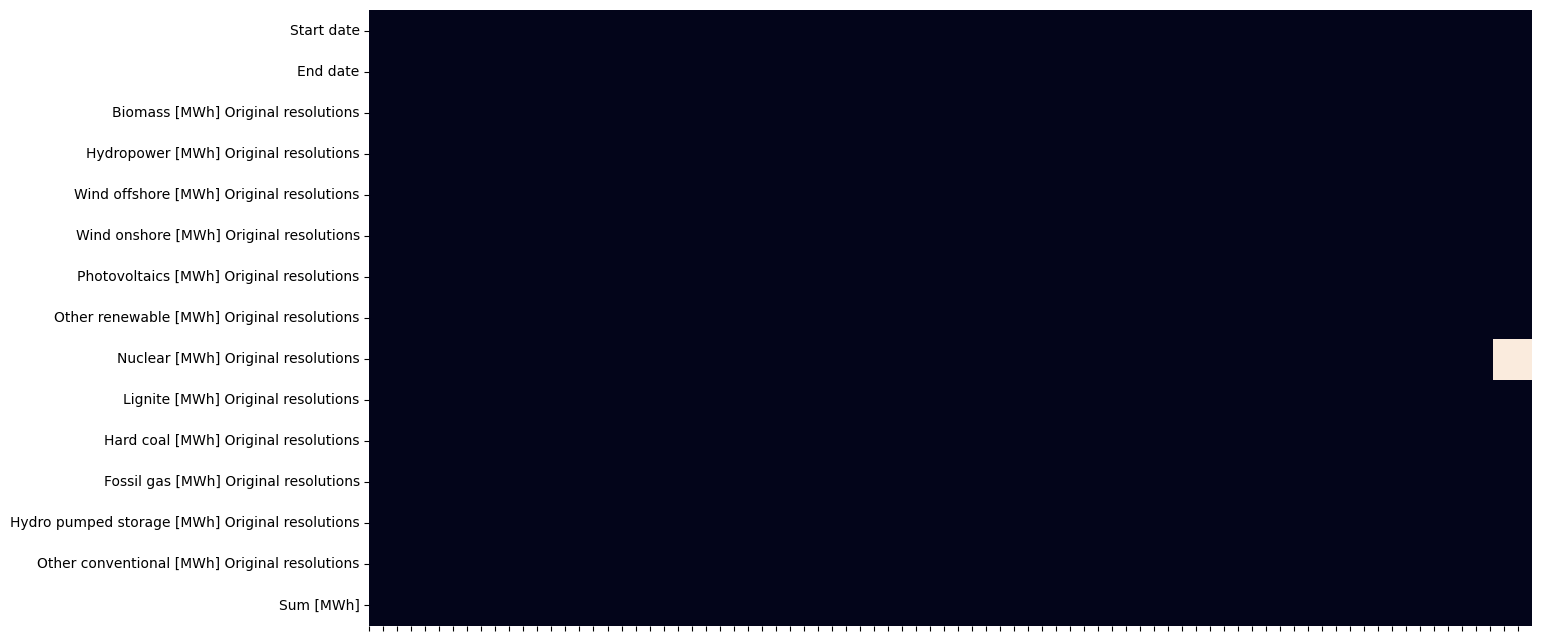

In [17]:
plt.figure(figsize=(15,8))

ax = sns.heatmap(Generation.isna().T,cbar=False)
ax.set(xticklabels=[])

plt.show()

Nuclear power was shut down in Germany at midnight on 15 April. Nuclear energy was marked as null in the data because it was not clear whether the coalition would decide to reopen the power plants due to the energy crisis in Europe caused by the Russia-Ukraine war. On 30 January 2024, nuclear energy was removed as an energy source from the data and all values are NaN. Therefore the NaN values are replaced by 0.

In [18]:
d = pd.to_datetime(['2023-04-15 23:30','2023-04-15 23:45', '2023-04-16 00:00','2023-04-16 00:15'])

Generation[Generation['Start date'].isin(d)][['Start date', 'Nuclear [MWh] Original resolutions']]


,Start date,Nuclear [MWh] Original resolutions
290586,2023-04-15 23:30:00,28.75
290587,2023-04-15 23:45:00,12.75
290588,2023-04-16 00:00:00,0.00
290589,2023-04-16 00:15:00,0.00


In [19]:
Generation = Generation.fillna(0)

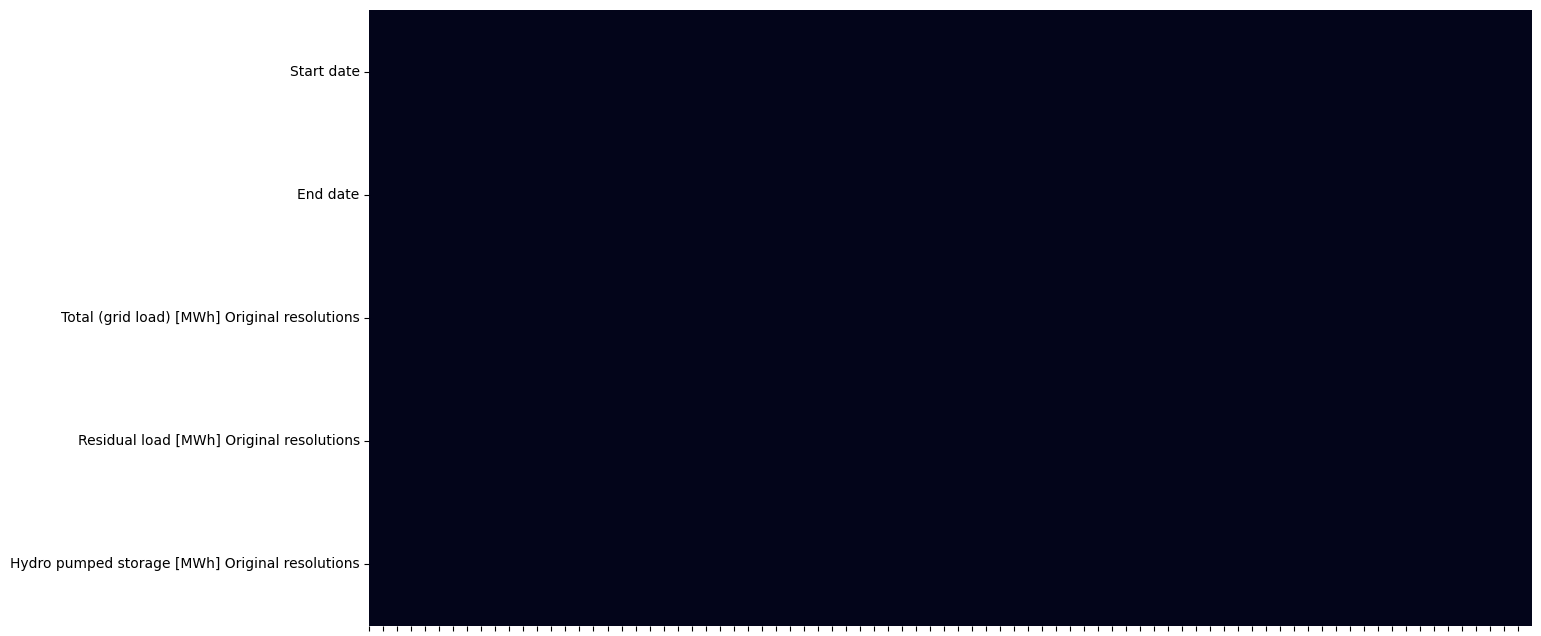

In [20]:
plt.figure(figsize=(15,8))

ax = sns.heatmap(Consumption.isna().T,cbar=False)
ax.set(xticklabels=[])
plt.show()

The dataset is complete. Hydro pumped storage and residual load are part of the total grid load.  

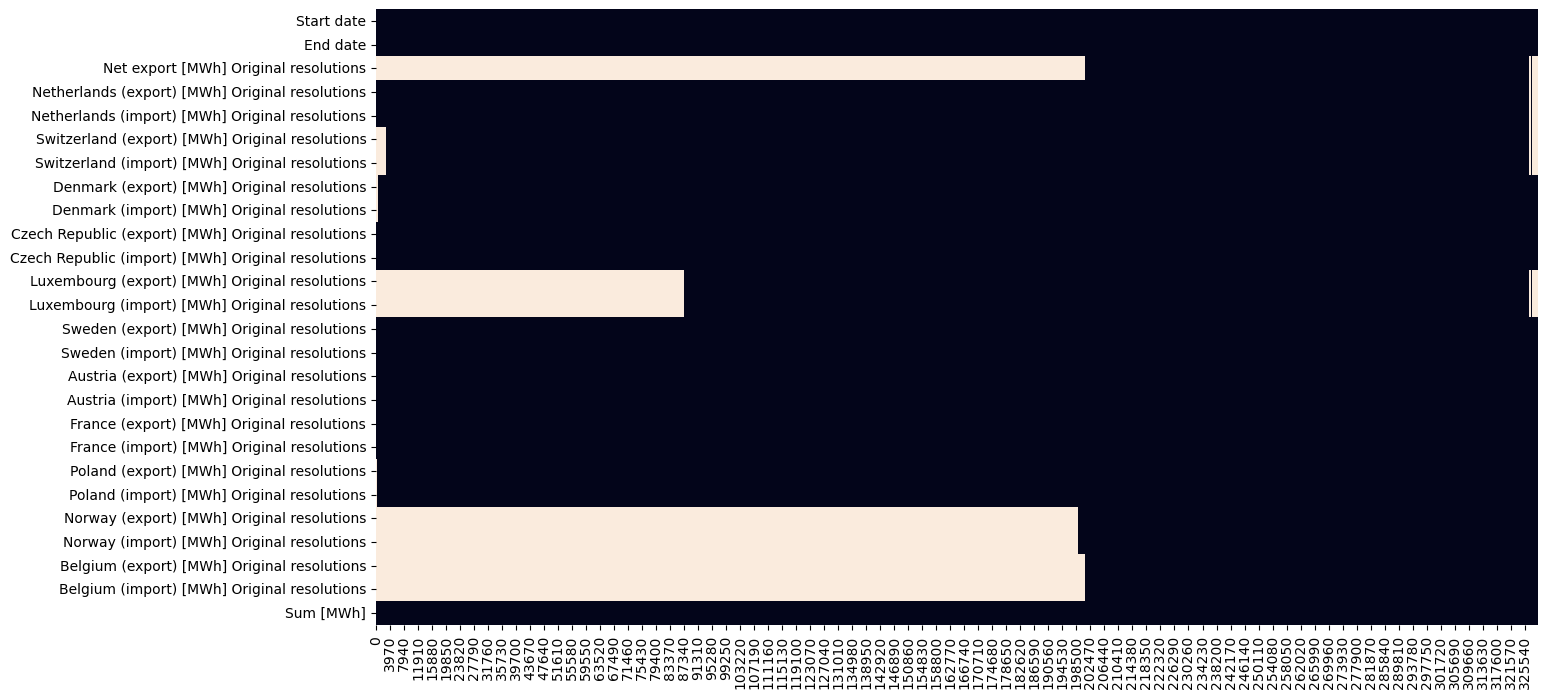

In [21]:
plt.figure(figsize=(15,8))

ax = sns.heatmap(Cross_Border.isna().T,cbar=False)
# ax.set(xticklabels=[])

plt.show()

Net Export seems to generate NaN values if the other columns have NaN values. The physical current flow is important for the balance of demand and supply. For this reason, a sum column has already been inserted, which replaces net export and is equivalent if net export has a value. All other values are replaced with 0. net export is removed. 

In [22]:
Cross_Border.columns

Index(['Start date', 'End date', 'Net export [MWh] Original resolutions',
       'Netherlands (export) [MWh] Original resolutions',
       'Netherlands (import) [MWh] Original resolutions',
       'Switzerland (export) [MWh] Original resolutions',
       'Switzerland (import) [MWh] Original resolutions',
       'Denmark (export) [MWh] Original resolutions',
       'Denmark (import) [MWh] Original resolutions',
       'Czech Republic (export) [MWh] Original resolutions',
       'Czech Republic (import) [MWh] Original resolutions',
       'Luxembourg (export) [MWh] Original resolutions',
       'Luxembourg (import) [MWh] Original resolutions',
       'Sweden (export) [MWh] Original resolutions',
       'Sweden (import) [MWh] Original resolutions',
       'Austria (export) [MWh] Original resolutions',
       'Austria (import) [MWh] Original resolutions',
       'France (export) [MWh] Original resolutions',
       'France (import) [MWh] Original resolutions',
       'Poland (export) [MWh] 

In [23]:
Cross_Border = Cross_Border.drop('Net export [MWh] Original resolutions', axis =1 )

In [24]:
Cross_Border = Cross_Border.fillna(0)

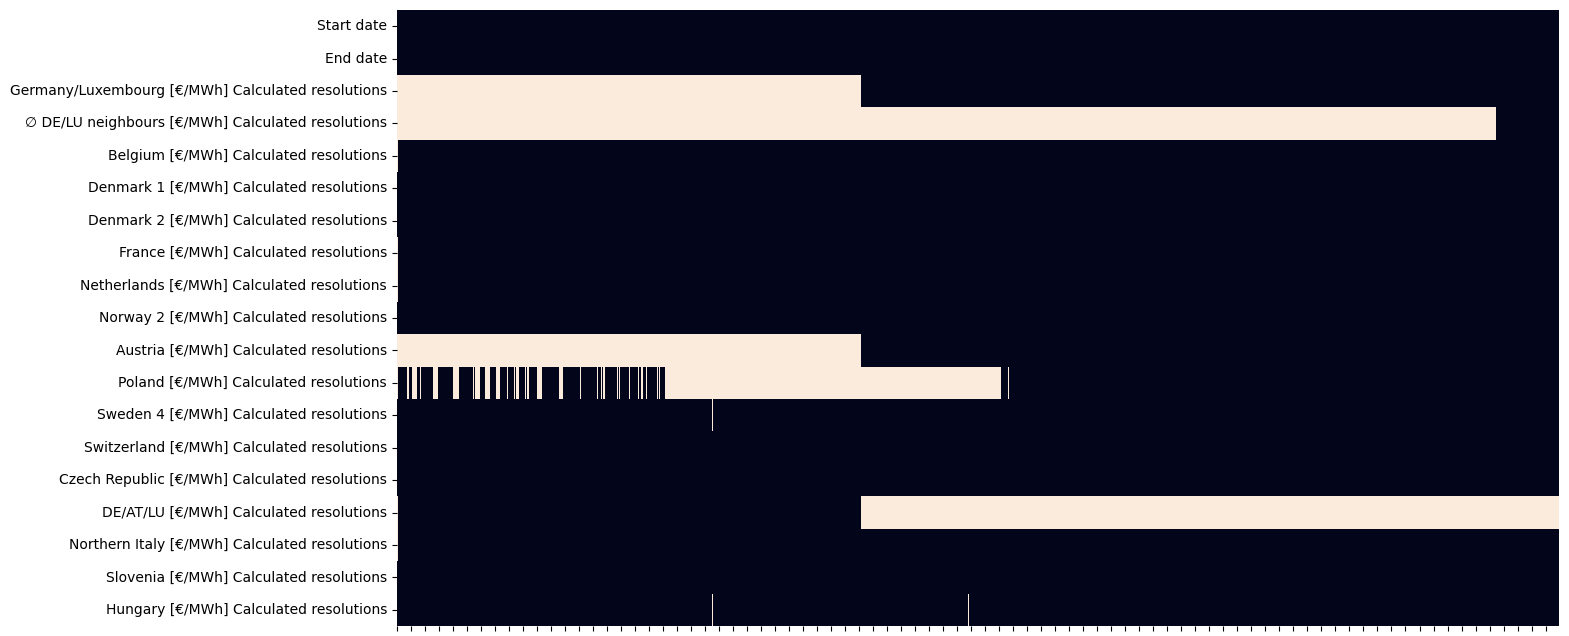

In [25]:
plt.figure(figsize=(15,8))

ax = sns.heatmap(Prices.isna().T,cbar=False)
ax.set(xticklabels=[])
plt.show()

With Prices is less clear. Therefore, the matter is considered in detail below

In [26]:
def list_to_dictionary(list):
    '''
    Example: 
    meine_liste = ['Apfel', 'Banane', 'Kirsche']
    mein_dictionary = liste_zu_dictionary(meine_liste)
    {
        0:Apfel,
        1:Banane,
        3:Kirsche
    }
    '''
    return {index: x for index, x in enumerate(list)}


We start with Prices 

In [27]:
columns = list_to_dictionary(list(Prices.columns)[2:]) # without Start date and End date 

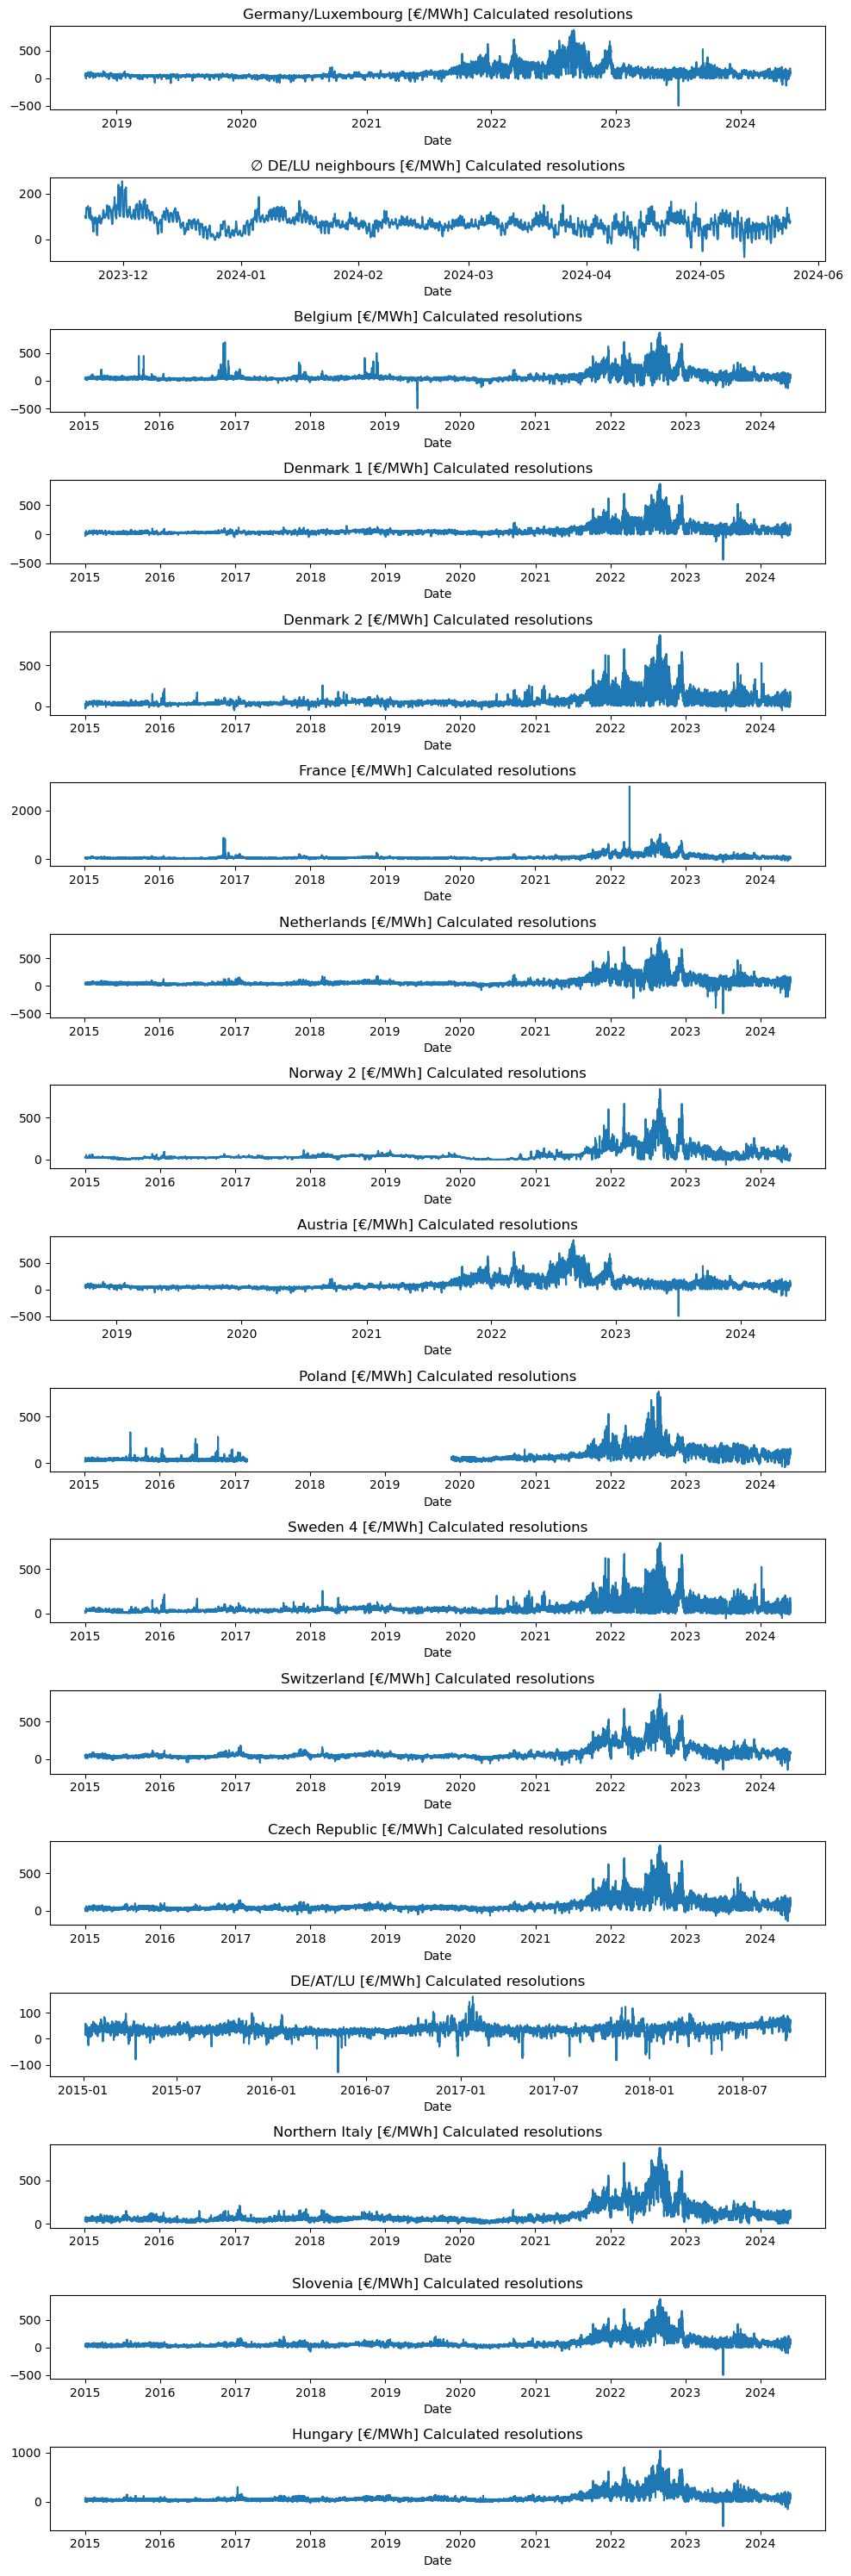

In [28]:
fig = plt.figure(figsize=(10, 30))  # Adjust figure size accordingly
gs = gridspec.GridSpec(17, 1, height_ratios=[1]*17)  # Adjust height_ratios as needed

for k, c in columns.items():
    ax = fig.add_subplot(gs[k])
    ax.plot(Prices['Start date'], Prices[c])
    ax.set_title(c)
    ax.set_xlabel('Date')

plt.tight_layout()
plt.show()

Germany, Luxembourg and Austria initially form a price zone in the data set. This ends and then splits into the Germany/Luxembourg and Austria zones.

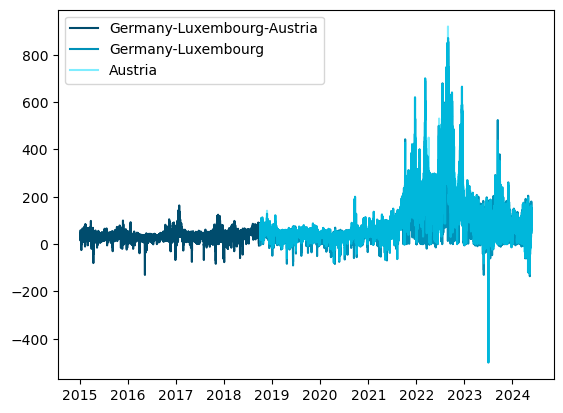

In [29]:
plt.figure()
plt.plot(Prices['Start date'], Prices[columns[13]],color = '#004c6d',label = "Germany-Luxembourg-Austria")
plt.plot(Prices['Start date'], Prices[columns[0]], color ='#0091b8' , label = "Germany-Luxembourg")
plt.plot(Prices['Start date'], Prices[columns[8]], color = '#00ddff', alpha = 0.5,label = "Austria")

plt.legend()
plt.show()

The columns complement each other. The split between Germany and Luxembourg on the one side and Austria on the other took place on 30 September 2018. The columns are therefore merged.

In [30]:
Prices['Germany/Luxembourg [€/MWh] Calculated resolutions'] = Prices['Germany/Luxembourg [€/MWh] Calculated resolutions'].fillna(0)+Prices['DE/AT/LU [€/MWh] Calculated resolutions'].fillna(0)
Prices['Austria [€/MWh] Calculated resolutions'] = Prices['Austria [€/MWh] Calculated resolutions'].fillna(0)+Prices['DE/AT/LU [€/MWh] Calculated resolutions'].fillna(0)

In [31]:
#drop the old column DE/AT/LU [€/MWh]
Prices = Prices.drop('DE/AT/LU [€/MWh] Calculated resolutions', axis = 1)

the missing values for Sweden 4 [€/MWh] and Hungary [€/MWh] are replaced by interpolation.

In [33]:
Prices['Hungary [€/MWh] Calculated resolutions'] = Prices['Hungary [€/MWh] Calculated resolutions'].interpolate(method='linear')

In [34]:
Prices['Sweden 4 [€/MWh] Calculated resolutions'] = Prices['Sweden 4 [€/MWh] Calculated resolutions'].interpolate(method='linear')

The column DU/LU neighbours is removed as a column, it is an average.

In [35]:
Prices = Prices.drop('∅ DE/LU neighbours [€/MWh] Calculated resolutions', axis = 1)

The Polish data set is being completed despite a large amount of missing data. Analyses of the complete and current values can be used later

In [36]:
Prices['Poland [€/MWh] Calculated resolutions'] = Prices['Poland [€/MWh] Calculated resolutions'].interpolate(method='linear')


to ensure that all border values are filled.

In [37]:
Prices = Prices.fillna(method='ffill').fillna(method='bfill')

Export

In [38]:
Prices.to_csv('../data/Prices.csv', index= False)
Cross_Border.to_csv('../data/Cross_Border.csv', index= False)
Consumption.to_csv('../data/Cosumption.csv', index= False)
Generation.to_csv('../data/Generation.csv', index= False)